# Lab book: qualidade de laboratórios de citopatologia

Taize Branco dos Santos (atualizado em 17/05/2021)

In [1]:
%matplotlib inline
import pandas as pd
import analysis

## 1. Leitura dos dados e cálculo dos índices de qualidade

+ Fonte: http://tabnet.datasus.gov.br/cgi/dhdat.exe?SISCAN/cito_colo_atendbr.def
+ Estados: Rio Grande do Sul (RS), Santa Catarina (SC) e Paraná (PR)
+ Período: 2015 a 2019

**Índices:**
+ Índice de positividade (`ind_pos`)
+ Percentual de ASC entre exames satisfatórios (`per_asc_sat`)
+ Percentual de ASC entre exames alterados (`per_asc_alt`)
+ Razão ASC/(LSIL + HSIL) (`raz_asc_sil`)
+ Percentual de HSIL entre exames satisfatórios (`per_hsil`)
+ Percentual de exames insatisfatórios (`per_ins`)

**Filtro:**
+ Seja $x_a$ o número de exames realizados pelo laboratório $x$ no ano $a$.
+ Os dados do laboratório $x$ em um determinado ano $a$ são contabilizados somente se $x_a \ge m$.
+ Parâmetro: $m = 1500$.
+ Exemplo: se um laboratório fez $1000$ exames em 2015 e $2200$ exames em 2016, seus dados não serão contabilizados no ano de 2015, mas serão contabilizados em 2016.

In [2]:
dados = analysis.leituraDados(['pr', 'sc', 'rs'], [2015, 2016, 2017, 2018, 2019])

In [3]:
print('No período de 2015 a 2019:')
analysis.printLabsExames(dados)

No período de 2015 a 2019:
	- Total de laboratórios: 187 (RS: 63; SC: 62; PR: 62)
	- Esses laboratórios fizeram um total de 7546672 exames (RS: 2013903; SC: 2139073; PR: 3393696)


In [4]:
dados = analysis.filtraDados(dados, 1500)

In [5]:
print('Após a filtragem:')
analysis.printLabsExames(dados)

Após a filtragem:
	- Total de laboratórios: 162 (RS: 56; SC: 50; PR: 56)
	- Esses laboratórios fizeram um total de 7486712 exames (RS: 1993835; SC: 2110398; PR: 3382479)


## 2. Estatística descritiva básica

Mostrando estatísticas básicas sobre o conjunto de dados.

In [6]:
pd.options.display.float_format = "{:.1f}".format
dados[['ex_total', 'ex_sat', 'ex_ins', 'asc_total', 'sil_total', 'ind_pos', 'per_asc_sat',
       'per_asc_alt', 'raz_asc_sil', 'per_hsil', 'per_ins', 'estado']].describe()

,ex_total,ex_sat,ex_ins,asc_total,sil_total,ind_pos,per_asc_sat,per_asc_alt,raz_asc_sil,per_hsil,per_ins
count,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,648.0,649.0,649.0
mean,11535.8,11454.4,67.7,213.1,108.7,3.0,1.9,58.5,2.5,0.3,0.6
std,9380.3,9315.2,126.2,366.1,155.0,2.5,1.8,15.6,4.6,0.3,1.0
min,1504.0,1500.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
25%,4962.0,4937.0,8.0,49.0,30.0,1.4,0.7,48.4,1.1,0.1,0.1
50%,8875.0,8826.0,24.0,112.0,62.0,2.2,1.3,60.5,1.8,0.2,0.3
75%,14857.0,14718.0,71.0,230.0,126.0,3.9,2.3,70.0,2.8,0.4,0.7
max,52746.0,52646.0,1625.0,4899.0,1564.0,15.8,11.6,100.0,93.4,2.5,9.1


## 3. Laboratórios

Mostrando a quantidade de laboratórios por estado em cada ano.

In [7]:
pd.options.display.float_format = "{:.0f}".format
analysis.quantidadeLaboratorios(dados)

,estado,2015,2016,2017,2018,2019
0,pr,53,51,46,45,44
1,sc,41,41,44,42,37
2,rs,36,40,43,40,46
3,total,130,132,133,127,127


## 4. Exames realizados

Mostrando a quantidade de exames realizados por estado em cada ano.

In [8]:
pd.options.display.float_format = "{:.0f}".format
analysis.quantidadeExames(dados)

,estado,2015,2016,2017,2018,2019,total
0,pr,679620,675862,680819,665326,680852,3382479
1,sc,398495,414028,430151,439622,428102,2110398
2,rs,308363,358734,389497,418656,518585,1993835
3,total,1386478,1448624,1500467,1523604,1627539,7486712


## 5. Indicadores de qualidade

Mostrando a média de cada indicador de qualidade por estado em cada ano.

In [9]:
pd.options.display.float_format = "{:.1f}".format
analysis.tabelaIndicadores(dados, 'mean')

,indicador,estado,2015,2016,2017,2018,2019
0,ind_pos,pr,2.7,2.8,2.9,2.9,2.6
1,ind_pos,sc,2.0,2.3,2.4,2.8,5.3
2,ind_pos,rs,2.5,2.6,2.9,3.1,5.9
3,ind_pos,mean_sul,2.4,2.6,2.7,2.9,4.6
4,per_asc_sat,pr,1.5,1.6,1.7,1.8,1.6
5,per_asc_sat,sc,1.2,1.4,1.5,1.7,3.3
6,per_asc_sat,rs,1.6,1.6,1.7,2.0,3.8
7,per_asc_sat,mean_sul,1.4,1.6,1.6,1.8,2.9
8,per_asc_alt,pr,55.3,57.0,57.0,60.6,58.2
9,per_asc_alt,sc,60.2,62.0,58.7,60.7,60.8


Mostrando a quantidade de laboratórios por estado, em função da adequabilidade segundo cada indicador.

In [10]:
analysis.tabelaIndicadoresLaboratorios(dados)

,indicador,estado,situacao,2015,2016,2017,2018,2019
0,ind_pos,pr,adequado,17 (32%),17 (33%),17 (37%),14 (31%),12 (27%)
1,ind_pos,pr,inadequado,36 (68%),34 (67%),29 (63%),31 (69%),32 (73%)
2,ind_pos,sc,adequado,7 (17%),9 (22%),10 (23%),13 (31%),27 (73%)
3,ind_pos,sc,inadequado,34 (83%),32 (78%),34 (77%),29 (69%),10 (27%)
4,ind_pos,rs,adequado,12 (33%),11 (28%),15 (35%),17 (42%),35 (76%)
5,ind_pos,rs,inadequado,24 (67%),29 (72%),28 (65%),23 (58%),11 (24%)
6,per_asc_sat,pr,adequado,52 (98%),50 (98%),43 (93%),42 (93%),43 (98%)
7,per_asc_sat,pr,inadequado,1 (2%),1 (2%),3 (7%),3 (7%),1 (2%)
8,per_asc_sat,sc,adequado,41 (100%),41 (100%),42 (95%),41 (98%),30 (81%)
9,per_asc_sat,sc,inadequado,0 (0%),0 (0%),2 (5%),1 (2%),7 (19%)


## 6. Análise

### 6.1. Indicadores ao longo do tempo

Mostrando a evolução dos estados segundo os indicadores de qualidade no período analisado.

<module 'matplotlib.pyplot' from '/home/marcelo/.venvs/myenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

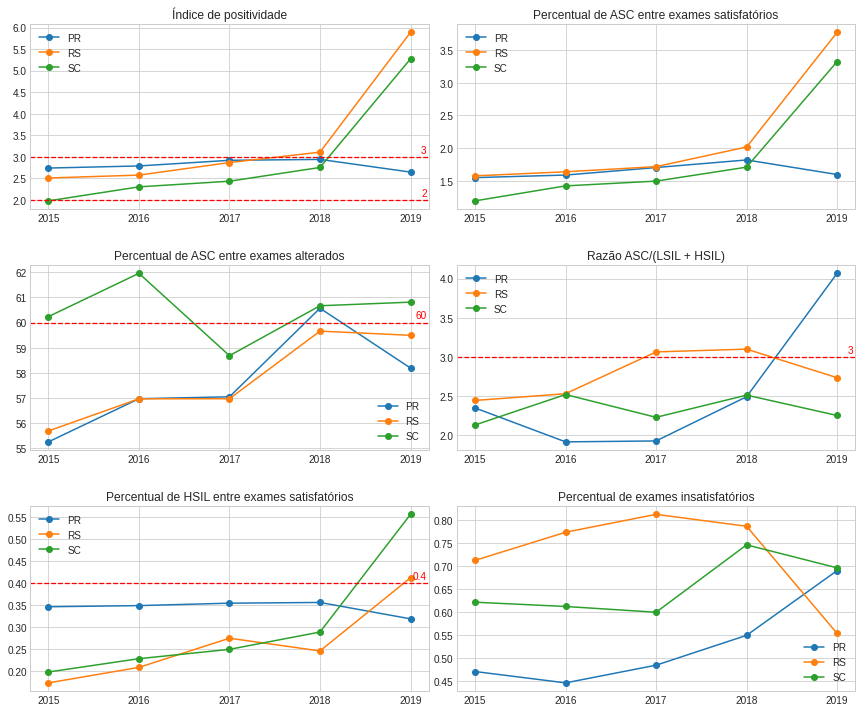

In [11]:
analysis.plotIndicadores(dados, 'mean')

### 6.2. Correlação entre indicadores

Mostrando o índice de positividade *versus* o percentual de ASC entre exames alterados (**todo o período**).

<module 'matplotlib.pyplot' from '/home/marcelo/.venvs/myenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

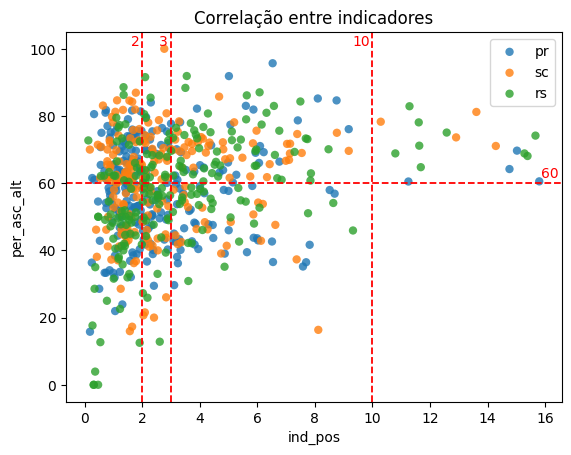

In [12]:
analysis.plotCorrelacao(dados, 'ind_pos', 'per_asc_alt', [2, 3, 10], [60])

Mostrando o índice de positividade *versus* o percentual de ASC entre exames alterados (**ano de 2017**).

<module 'matplotlib.pyplot' from '/home/marcelo/.venvs/myenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

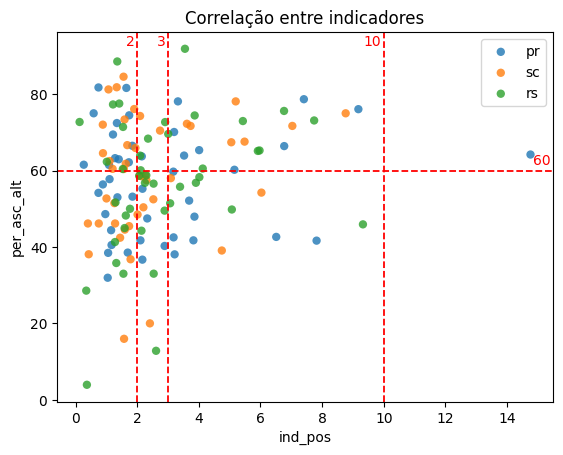

In [13]:
analysis.plotCorrelacao(dados[dados['ano'] == '2017'], 'ind_pos', 'per_asc_alt', [2, 3, 10], [60])

<module 'matplotlib.pyplot' from '/home/marcelo/.venvs/myenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

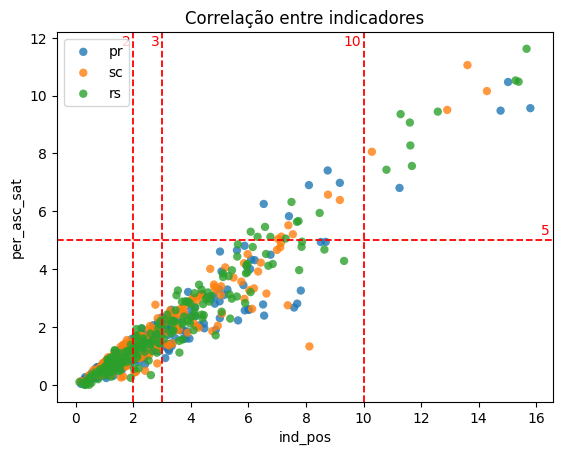

In [14]:
analysis.plotCorrelacao(dados, 'ind_pos', 'per_asc_sat', [2, 3, 10], [5])